#  <center> Modelling and Simulation Innovative Project <center>

## <center> <font color = green > Simulate a Model to predict COVID-19 Outbreak using Machine Learning</font> </center>

In [1]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## <center>Summary of Primary Dataset</center>

In [2]:
data = pandas.read_csv('data/nation_level_daily.csv')
data

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date2,Unnamed: 8
0,30-Jan,1,1,0,0,0,0,1,NaN
1,31-Jan,0,1,0,0,0,0,2,NaN
2,01-Feb,0,1,0,0,0,0,3,NaN
3,02-Feb,1,2,0,0,0,0,4,NaN
4,03-Feb,1,3,0,0,0,0,5,NaN
...,...,...,...,...,...,...,...,...,...
185,02-Aug,52672,1804857,40355,1187261,760,38180,186,NaN
186,03-Aug,50488,1855345,43070,1230331,806,38986,187,NaN
187,04-Aug,51282,1906627,51220,1281551,849,39835,188,NaN
188,05-Aug,56626,1963253,45583,1327134,919,40754,189,NaN


In [3]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date2,Unnamed: 8
count,190.000000,1.900000e+02,190.000000,1.900000e+02,190.000000,190.000000,190.000000,0.0
mean,10660.121053,3.088709e+05,7248.815789,1.869665e+05,219.226316,7849.294737,95.500000,NaN
std,15739.372014,4.939299e+05,11755.421065,3.223640e+05,291.382213,11371.176250,54.992424,NaN
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,NaN
25%,22.750000,1.522500e+02,1.000000,1.500000e+01,0.250000,3.000000,48.250000,NaN
50%,2961.500000,4.460600e+04,1022.000000,1.230400e+04,91.500000,1514.500000,95.500000,NaN
75%,14512.250000,4.077742e+05,10594.750000,2.246905e+05,383.250000,13201.000000,142.750000,NaN
max,62170.000000,2.025423e+06,51368.000000,1.377275e+06,2004.000000,41653.000000,190.000000,NaN


## <center>Plot b/w Total Confirmed Cases and Total Recovered Cases</center>

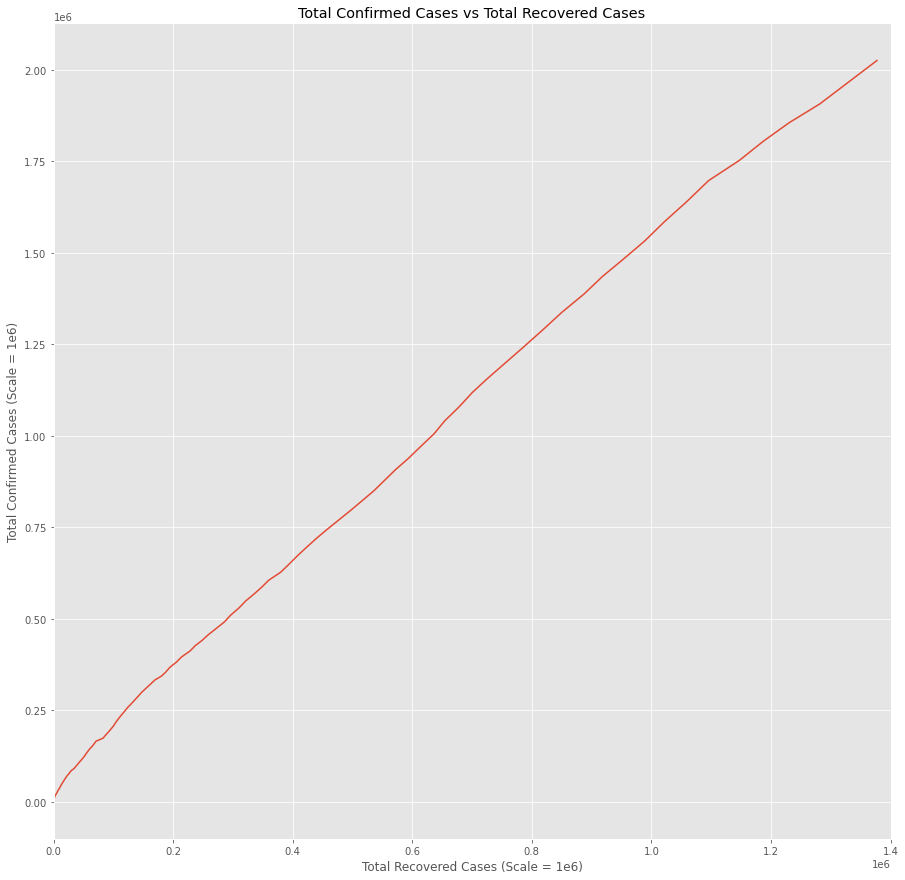

In [4]:
x = DataFrame(data,columns=['Total Recovered'])
y = DataFrame(data,columns=['Total Confirmed'])
plt.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.xlabel('Total Recovered Cases (Scale = 1e6)')
plt.ylabel('Total Confirmed Cases (Scale = 1e6)')
plt.xlim(0,1.4e6)
plt.title('Total Confirmed Cases vs Total Recovered Cases')
plt.plot(x,y)

## <center>Plot showing Total Number of Confirmed Cases for each Date </center>

<AxesSubplot:title={'center':'Total No. of Confirmed Cases for each date'}, xlabel='Date', ylabel='No. of Confirmed Cases (Scale = 1e6)'>

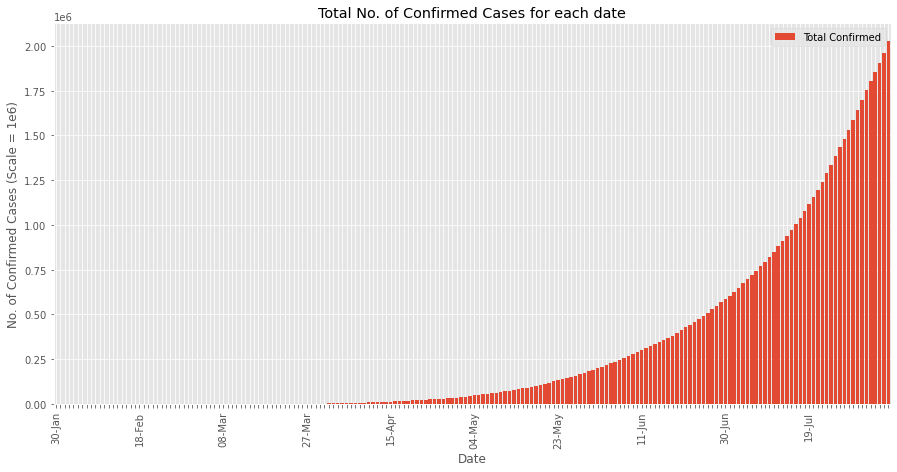

In [5]:
data2 = pandas.read_csv('data/nation_level_daily.csv',usecols=['Date','Total Confirmed'],parse_dates=['Date'])
data2.set_index('Date',inplace = True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data2.index,data['Total Confirmed'])

n = 19
for index,label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.title('Total No. of Confirmed Cases for each date')
plt.ylabel('No. of Confirmed Cases (Scale = 1e6)')
data2.plot(kind='bar',ax=ax)

## <center>Prediction of Confirmed Cases</center> 

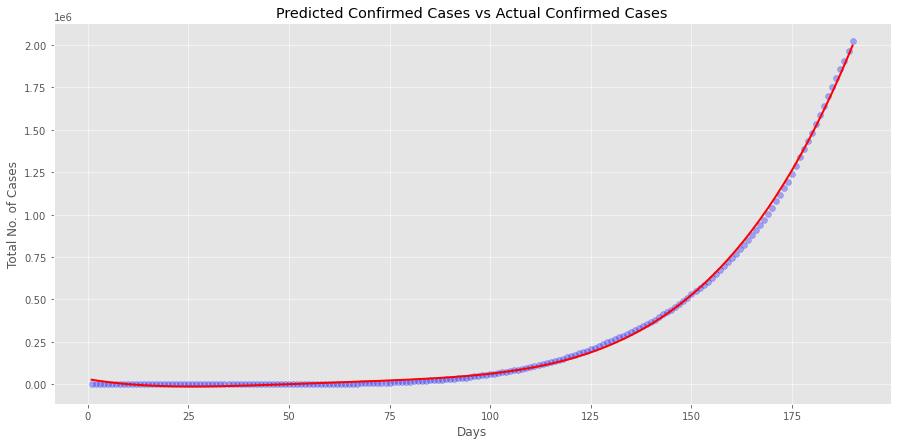

In [25]:
x1 = DataFrame(data,columns=['Date2'])
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x1)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
plt.figure(figsize=(15,7))
plt.scatter(x1,y, color = 'blue',alpha=0.3)
plt.plot(x1,lin2.predict(poly.fit_transform(x1)), color = 'red')
plt.title('Polynomial Regression')
plt.title('Predicted Confirmed Cases vs Actual Confirmed Cases')
plt.xlabel('Days')
plt.ylabel('Total No. of Cases')
plt.show()

In [27]:
lin2.predict(poly.fit_transform([[200]]))

array([[2642890.73179404]])

## <center>Plot showing Total Recovered Cases for each Date</center>

<AxesSubplot:title={'center':'Total Recovered Cases for each date'}, xlabel='Date', ylabel='No. of Recovered Cases (Scale = 1e6)'>

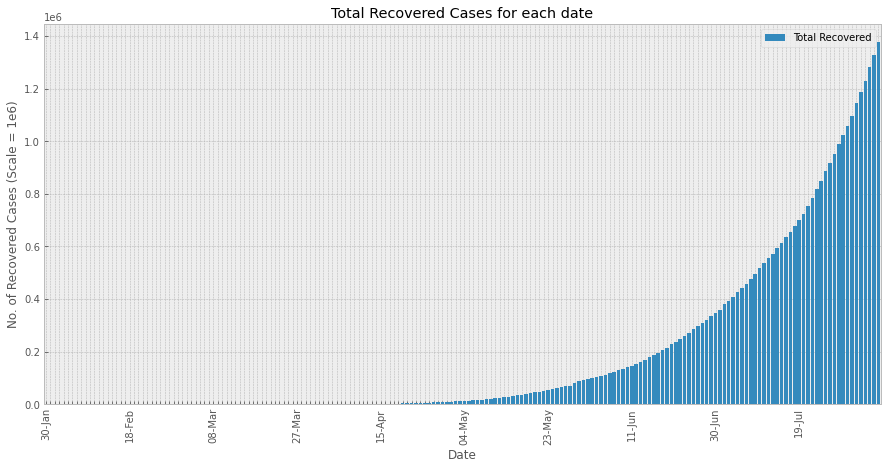

In [8]:
data2 = pandas.read_csv('data/nation_level_daily.csv',usecols=['Date','Total Recovered'],parse_dates=['Date'])
data2.set_index('Date',inplace = True)

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data2.index,data['Total Recovered'])

n = 19
for index,label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
        
plt.title('Total Recovered Cases for each date')
plt.ylabel('No. of Recovered Cases (Scale = 1e6)')
data2.plot(kind='bar',ax=ax)

## <center>Prediction of Recovered Cases</center>

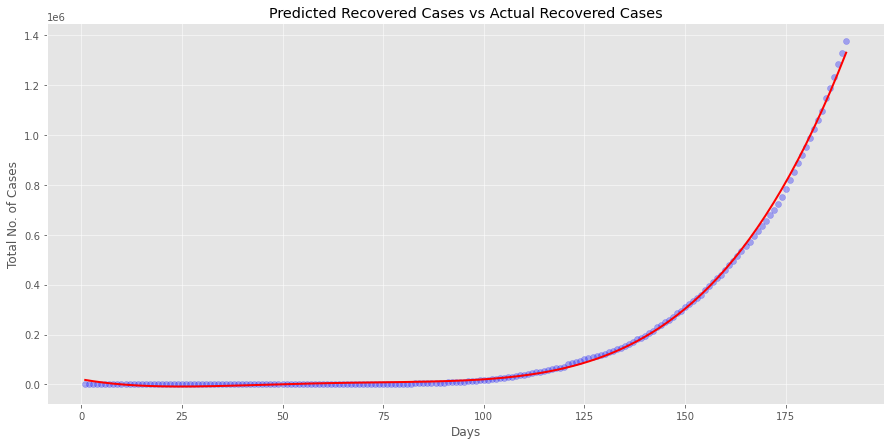

In [28]:
x1 = DataFrame(data,columns=['Date2'])
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x1)
poly.fit(X_poly, x)
lin2 = LinearRegression()
lin2.fit(X_poly, x)
plt.figure(figsize=(15,7))
plt.scatter(x1,x, color = 'blue',alpha=0.3)
plt.plot(x1,lin2.predict(poly.fit_transform(x1)), color = 'red')
plt.title('Polynomial Regression')
plt.title('Predicted Recovered Cases vs Actual Recovered Cases')
plt.xlabel('Days')
plt.ylabel('Total No. of Cases')
plt.show()

In [29]:
lin2.predict(poly.fit_transform([[198]]))

array([[1691424.84807599]])

## <center>Total Confirmed Cases for each State</center>

<AxesSubplot:title={'center':'No. of Confirmed Cases for each State'}, xlabel='State', ylabel='No. of Confirmed Cases'>

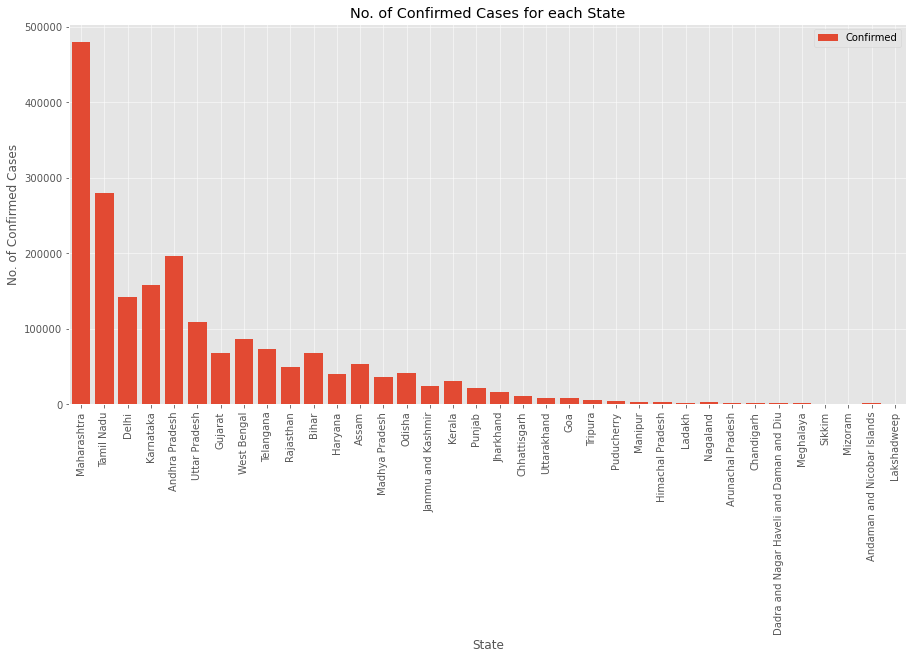

In [11]:
data4 = pandas.read_csv('data/state_level_latest.csv',usecols=['State','Confirmed'],parse_dates=['State'])
data4.set_index('State',inplace = True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data4.index,data4['Confirmed'])
plt.title('No. of Confirmed Cases for each State')
plt.ylabel('No. of Confirmed Cases')
data4.plot(kind='bar',ax=ax)

## <center>Total Recovered Cases for each State</center>

<AxesSubplot:title={'center':'No. of Recovered Cases for each State'}, xlabel='State', ylabel='No. of Recovered Cases'>

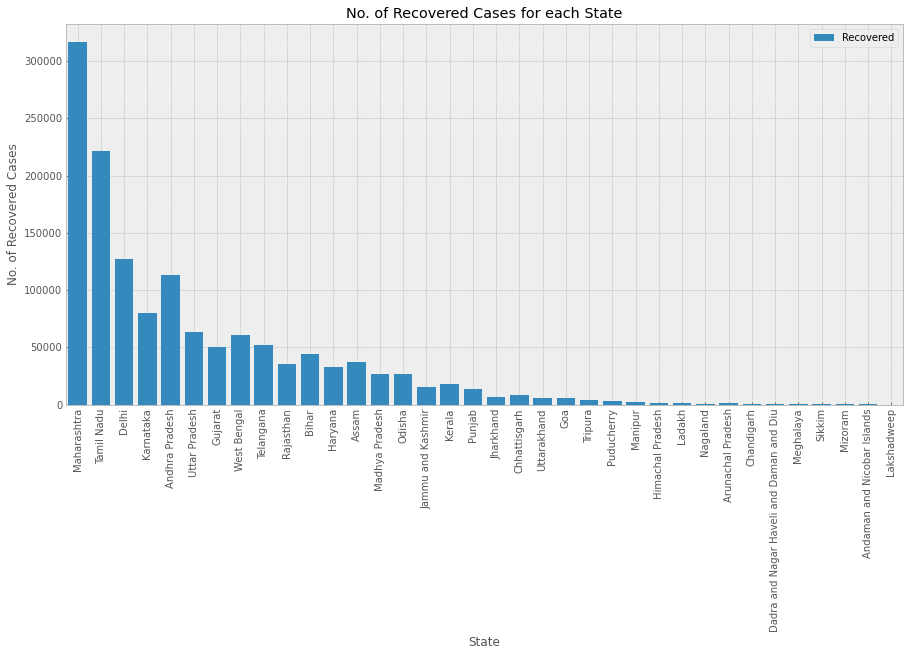

In [12]:
data5 = pandas.read_csv('data/state_level_latest.csv',usecols=['State','Recovered'],parse_dates=['State'])
data5.set_index('State',inplace = True)

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data5.index,data5['Recovered'])
plt.title('No. of Recovered Cases for each State')
plt.ylabel('No. of Recovered Cases')
data5.plot(kind='bar',ax=ax)

## <center>Total Confirmed Cases of each District for most affected State </center>

<AxesSubplot:title={'center':'No. of Confirmed Cases for each District in Maharashtra'}, xlabel='District', ylabel='No. of Confirmed Cases'>

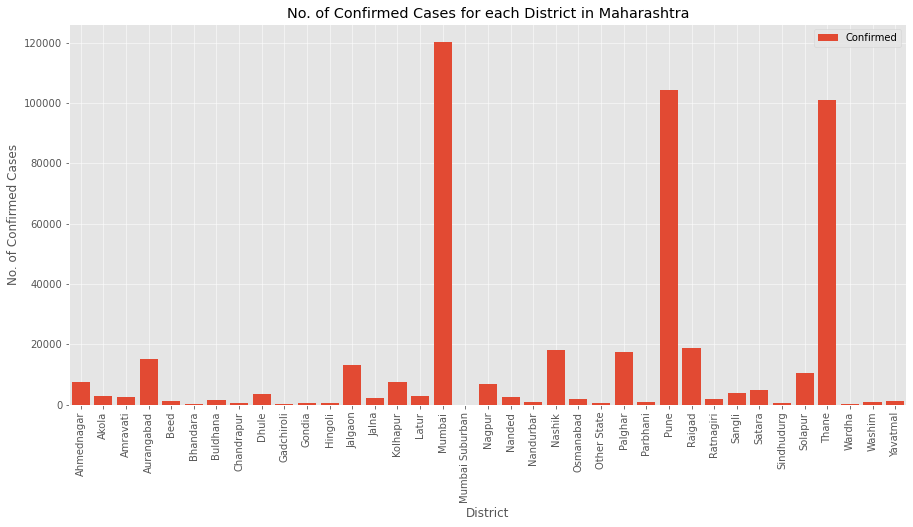

In [13]:
data4 = pandas.read_csv('data/maharashtra.csv',usecols=['District','Confirmed'],parse_dates=['District'])
data4.set_index('District',inplace = True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data4.index,data4['Confirmed'])
plt.title('No. of Confirmed Cases for each District in Maharashtra')
plt.ylabel('No. of Confirmed Cases')
data4.plot(kind='bar',ax=ax)

## <center>Total Recovered Cases of each District for most affected State</center>

<AxesSubplot:title={'center':'Recovered Cases for each District in Maharashtra'}, xlabel='District', ylabel='No. of Recovered Cases'>

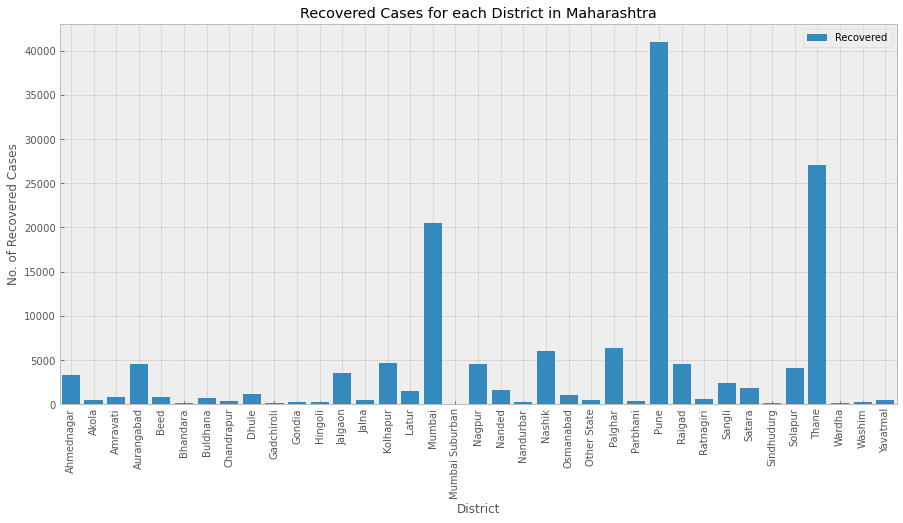

In [14]:
data6 = pandas.read_csv('data/maharashtra.csv',usecols=['District','Recovered'],parse_dates=['District'])
data6.set_index('District',inplace = True)

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data6.index,data6['Recovered'])

plt.ylabel('No. of Recovered Cases')
plt.title('Recovered Cases for each District in Maharashtra')
data6.plot(kind='bar',ax=ax)

## <center> Percentage of cases for different Age Groups</center>

<AxesSubplot:title={'center':'Age Group wise Coronavirus Cases as of July 9,2020'}, xlabel='Age Group', ylabel='Percent'>

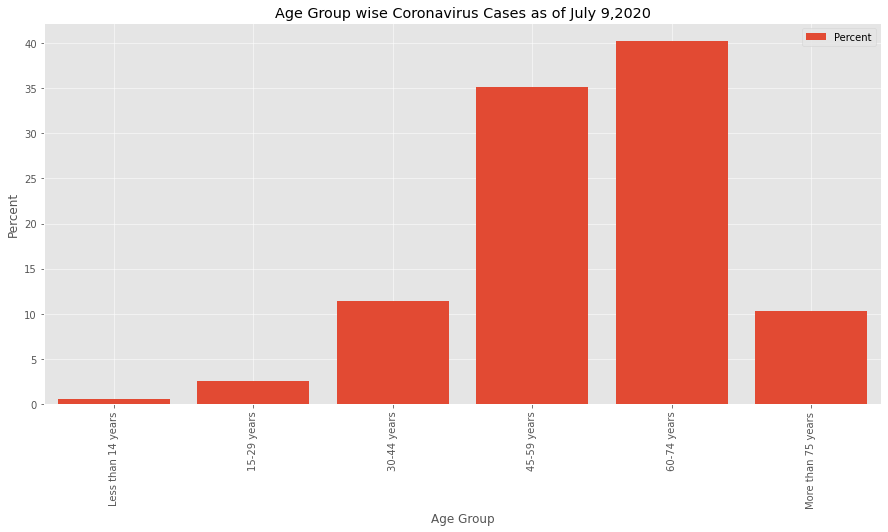

In [15]:
data4 = pandas.read_csv('data/Age_Group India.csv',usecols=['Age Group','Percent'],parse_dates=['Age Group'])
data4.set_index('Age Group',inplace = True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data4.index,data4['Percent'])

plt.title('Age Group wise Coronavirus Cases as of July 9,2020')  
plt.ylabel('Percent')
data4.plot(kind='bar',ax=ax)

## <center>Gender wise Percentage distribution for majorly affected States</center>

<AxesSubplot:title={'center':'Gender wise case distribution as of May'}, xlabel='State', ylabel='Percentage'>

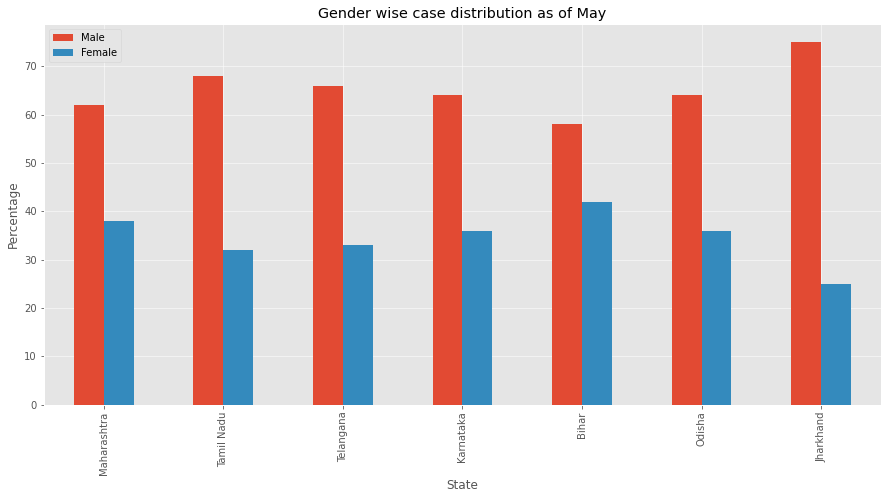

In [16]:
data5 = pandas.read_csv('data/state_level_gender.csv',usecols=['State','Male','Female'],parse_dates=['State'])
data5.set_index('State',inplace = True)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))

plt.title('Gender wise case distribution as of May')
plt.ylabel('Percentage')
data5.plot(kind='bar',ax=ax)